# Data Science Regression Project: Predicting Home Prices in Banglore

we are building a model that can predict the property price  based on certain features  such as bedroom, bathroom.location,etc

In [3]:
#Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib



In [4]:
data = pd.read_csv('Downloads/Bengaluru_House_Data.csv')
data

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [3]:
data.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [4]:
data.dtypes

area_type        object
availability     object
location         object
size             object
society          object
total_sqft       object
bath            float64
balcony         float64
price           float64
dtype: object

In [5]:
data.shape

(13320, 9)

In [6]:
data['area_type'].unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [7]:
#examine the area type feautre

data.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [8]:
#now am going to keep my model  very simple and for that reason  am going to drop certain columns from my dataset
#Drop features that are not required to build our model

data2= data.drop(['area_type','society','balcony','availability'],axis='columns')
data2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


# Data Cleaning: Handle NA values

In [9]:
data2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [10]:
data2.shape

(13320, 5)

In [11]:
data3= data2.dropna()
data3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [12]:
#df['Age'] = df['Age'].fillna(df['Age'].mean())

In [13]:
data3.shape

(13246, 5)

# Feature Engineering
Add new feature(integer) for bhk (Bedrooms Hall Kitchen)

In [14]:
data3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [15]:
data3['bhk'] = data3['size'].apply(lambda x: int(x.split(' ')[0]))
data3.bhk.unique()


<ipython-input-15-05d170376924>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data3['bhk'] = data3['size'].apply(lambda x: int(x.split(' ')[0]))


array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [16]:
data3.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [17]:
data3[data3.bhk>10]

,location,size,total_sqft,bath,price,bhk
459,1 Giri Nagar,11 BHK,5000,9.0,360.0,11
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
1768,1 Ramamurthy Nagar,11 Bedroom,1200,11.0,170.0,11
3379,1Hanuman Nagar,19 BHK,2000,16.0,490.0,19
3609,Koramangala Industrial Layout,16 BHK,10000,16.0,550.0,16
3853,1 Annasandrapalya,11 Bedroom,1200,6.0,150.0,11
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43
4916,1Channasandra,14 BHK,1250,15.0,125.0,14
6533,Mysore Road,12 Bedroom,2232,6.0,300.0,12
7979,1 Immadihalli,11 BHK,6000,12.0,150.0,11


In [18]:
#Exploring total_sqft feature


In [19]:
data3.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [20]:
def is_float(x):
    try:                #the way this function work is i will try to convert a value in total sqft column
        float(x)        # into float and if it is not a valid value for eg(1133-1384)
    except:
        return False     #it will come into this except  block
    return True

In [21]:
data3[~data3['total_sqft'].apply(is_float)].head()

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2


In [22]:
def convert_sqft_to_num(a):
    tokens = a.split('-')              
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(a)
    except:
        return None   

In [23]:
convert_sqft_to_num('2100 - 2850')

2475.0

In [24]:
convert_sqft_to_num('2850')

2850.0

In [25]:
data4 = data3.copy()           #---->>it will create a deep copy
data4.total_sqft = data4.total_sqft.apply(convert_sqft_to_num)
data4.head(5)

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [26]:
#For below row, it shows total_sqft as 2475 which is an average of the range 2100-2850

In [27]:
data4.loc[30]

location      Yelahanka
size              4 BHK
total_sqft       2475.0
bath                4.0
price             186.0
bhk                   4
Name: 30, dtype: object

so far  i have cleaned up my total sqr ft column,i have also handle my NA and i have removed  some unnecesarry features,so my data frame looksmuch better compare to  what i loaded up with


# Feature Engineering

In [28]:
data5=data4.copy()

In [29]:
data5.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [30]:
#------>>Adding new feature called price per square feet >>> this feature will help us  to do some oulier cleaning later

In [31]:
data5['price_per_sqft'] = data5['price']*100000/data5['total_sqft']
data5.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


# Examine locations which is a categorical variable

In [32]:
data5.location.nunique()  # We need to apply dimensionality reduction technique here to reduce number of locations

1304

#i have 1304 location  which is big no. 
usually we handle the text data  we convert it into dummy column, and if i keep this  location ,i will 1304  cloumns in my df, 
this is a high dimensionality problem.


In [33]:
location_stats= data5['location'].value_counts(ascending=False)
location_stats

Whitefield                            534
Sarjapur  Road                        392
Electronic City                       302
Kanakpura Road                        266
Thanisandra                           233
                                     ... 
Kuvempu Layout                          1
CQAL LAYOUT C BLOCK                     1
Banashankari 6th stage , 2nd block      1
Arekempanahalli                         1
M.G Road                                1
Name: location, Length: 1304, dtype: int64

white feild loc has maximum no.if rows in my csv file 534 data points,
and we see that  many loc which has only one data point, so we can come up with threshold and say that  any loc which has 10 data points other location

# Dimensionality Reduction
Any location having less than 10 data points should be tagged as "other" location. This way number of categories can be reduced by huge amount. Later on when we do one hot encoding, it will help us with having fewer dummy columns

In [34]:
len(location_stats[location_stats<=10])

1063

In [35]:
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10

Ganga Nagar                           10
Naganathapura                         10
Nagappa Reddy Layout                  10
Sadashiva Nagar                       10
Dodsworth Layout                      10
                                      ..
Kuvempu Layout                         1
CQAL LAYOUT C BLOCK                    1
Banashankari 6th stage , 2nd block     1
Arekempanahalli                        1
M.G Road                               1
Name: location, Length: 1063, dtype: int64

#--below we apply lambda function here,and i will say this loc is other if x is in location stas less than 10 else whatever the value you kept

In [36]:
data5.location = data5.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len(data5.location.unique())

242

In [37]:
data5.head(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.244275
9,other,6 Bedroom,1020.0,6.0,370.00,6,36274.509804


In [38]:
data5.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13200.000000,13246.000000,13246.000000,13246.000000,1.320000e+04
mean,1555.302783,2.692586,112.389392,2.801902,7.920759e+03
std,1237.323445,1.341506,149.076587,1.295758,1.067272e+05
min,1.000000,1.000000,8.000000,1.000000,2.678298e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.267701e+03
50%,1275.000000,2.000000,72.000000,3.000000,5.438331e+03
75%,1672.000000,3.000000,120.000000,3.000000,7.317073e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


# outlier detection and removal


In [39]:
data5[data5.total_sqft/data5.bhk<300].head(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,other,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000
78,Kaval Byrasandra,2 BHK,460.0,1.0,22.0,2,4782.608696
89,Rajaji Nagar,6 Bedroom,710.0,6.0,160.0,6,22535.211268
119,Hennur Road,2 Bedroom,276.0,3.0,23.0,2,8333.333333
129,Vishwapriya Layout,7 Bedroom,950.0,7.0,115.0,7,12105.263158
149,other,6 Bedroom,1034.0,5.0,185.0,6,17891.682785


In [40]:
data5.shape

(13246, 7)

In [41]:
data6 = data5[~(data5.total_sqft/data5.bhk<300)]
data6.shape

(12502, 7)

# Outlier Removal Using Standard Deviation and Mean

In [42]:
data6.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64


Here we find that min price per sqft is 267 rs/sqft whereas max is 176470, this shows a wide variation in property prices. We should remove outliers per location using mean and one standard deviation

#we are going to write a function that can remove  these extreme cases based on  std ,


#asuming that our data should have normal distribution,
then most of the data points  should lie between mean and  1 std

#below am writing a function which can remove price per sqft outliers  for location,we have to do this per location beacuse some loction has high price and some location will have less price

#we will find  mean std  per location and then filter out which are beyond one std 

In [43]:
def remove_pps_outliers(data):                        # am taking dataframe as an input
    data_out = pd.DataFrame()
    for key, sub_data in data.groupby('location'):     # and am grouping them by  location, 
        m = np.mean(sub_data.price_per_sqft)           # and per loction ,i get this sub_data for which am calculating  mean and std
        st = np.std(sub_data.price_per_sqft)
        reduced_df = sub_data[(sub_data.price_per_sqft>(m-st)) & (sub_data.price_per_sqft<=(m+st))] #here am filtering data points which are beyond the std
        data_out = pd.concat([data_out,reduced_df])         #here i keep appending those df per location and this will give me the output data frame
    return data_out
#we removed price_per_sqft outlier from data6

In [44]:
data7 = remove_pps_outliers(data6)
data7.shape

(10244, 7)

# Let's check if for a given location how does the 2 BHK and 3 BHK property prices look like

In [45]:
def plot_scatter_chart(data,location):
    bhk2 = data[(data.location==location) & (data.bhk==2)]
    bhk3 = data[(data.location==location) & (data.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='red',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()

In [46]:
data5.head(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.244275
9,other,6 Bedroom,1020.0,6.0,370.00,6,36274.509804


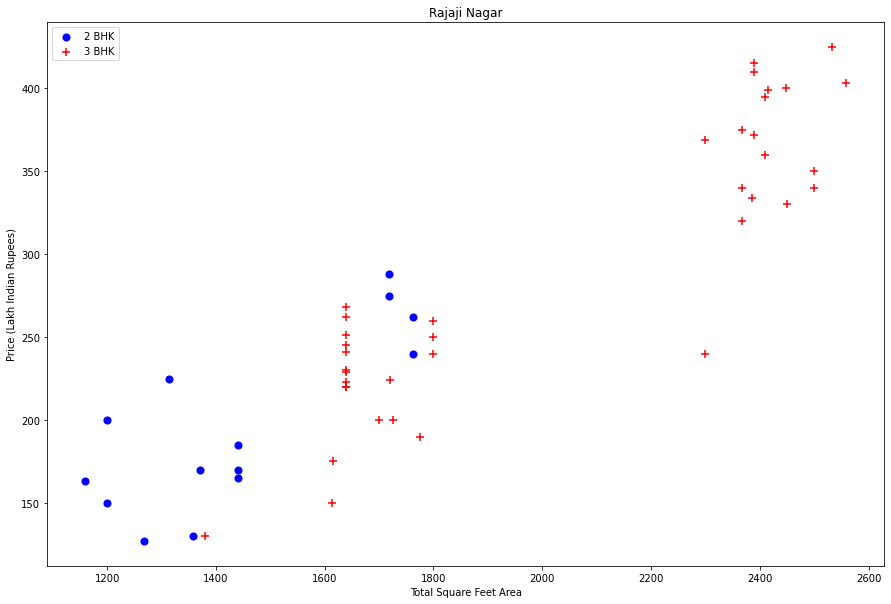

In [47]:
plot_scatter_chart(data7,"Rajaji Nagar")

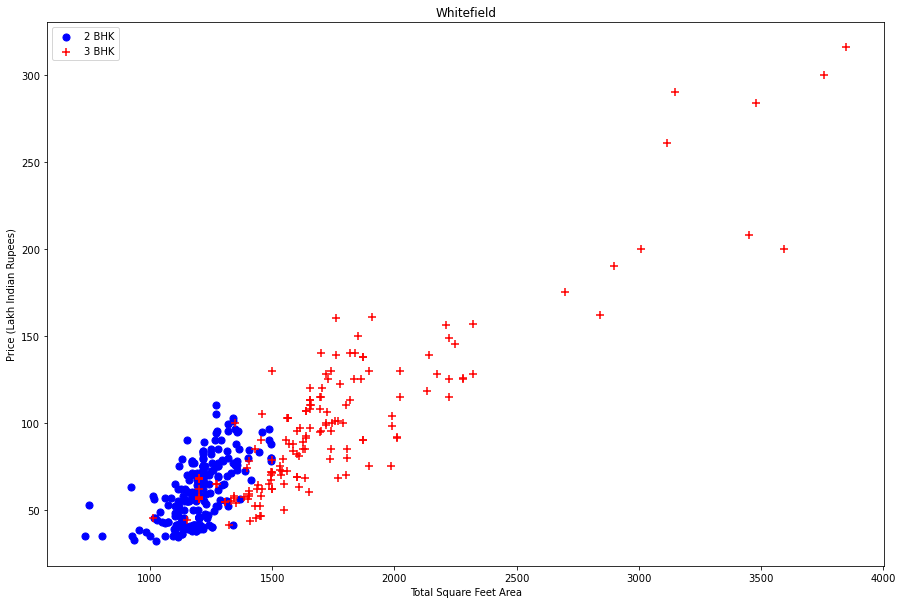

In [48]:
plot_scatter_chart(data7,"Whitefield")

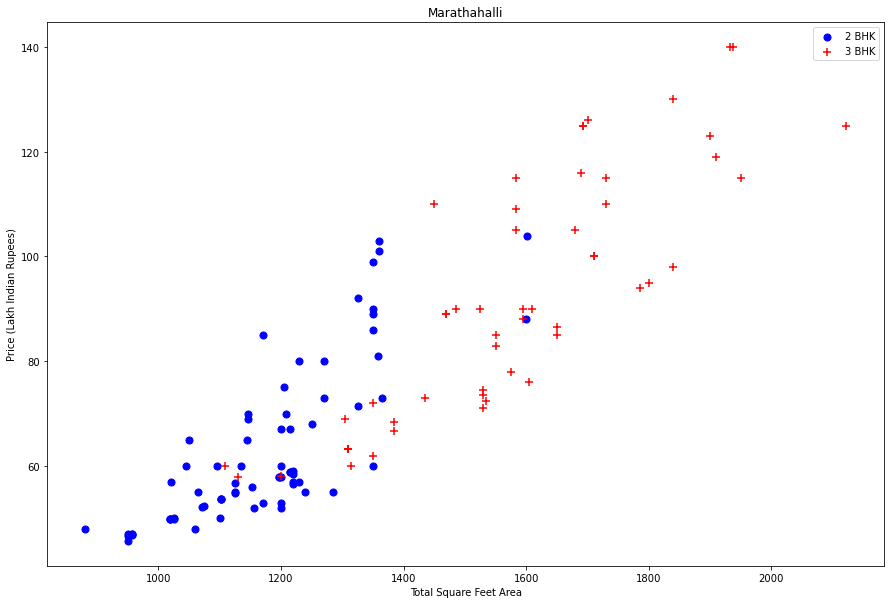

In [49]:
plot_scatter_chart(data7,"Marathahalli")

In [50]:
data7.shape

(10244, 7)

In [51]:
#Now we can remove those 2 BHK apartments whose price_per_sqft is less than mean price_per_sqft of 1 BHK apartment

def remove_bhk_outliers(data):               #
    exclude_indices = np.array([])
    for location, location_data in data.groupby('location'):  #|here am doing loc grouby, going trhrough  evrey loc df and for evrry loc  df  
                                                              #|am again creating new df  based on bhk and per bhk df am computing mean std and
        bhk_stats = {}                                         #|count
        for bhk, bhk_data in location_data.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_data.price_per_sqft),     #once this  for loop is over am running the same for loop again
                'std': np.std(bhk_data.price_per_sqft),        
                'count': bhk_data.shape[0]
            }                                            
        for bhk, bhk_data in location_data.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)         #here am trying to exclude those data points whose value of price per sqft is less than  the mean of the previous bhk
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_data[bhk_data.price_per_sqft<(stats['mean'])].index.values)
    return data.drop(exclude_indices,axis='index')
data8 = remove_bhk_outliers(data7)

data8.shape

(7342, 7)

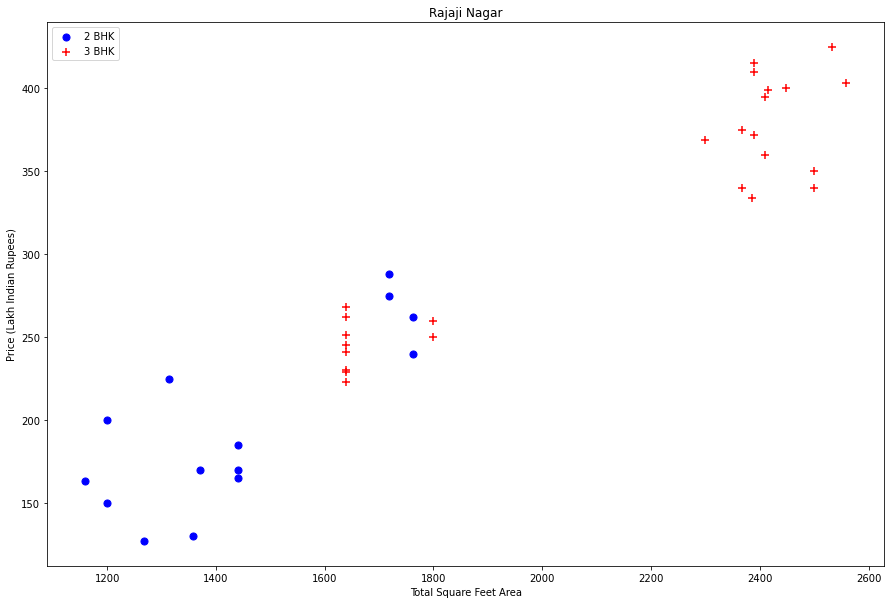

In [52]:
#Plot same scatter chart again to visualize price_per_sqft for 2 BHK and 3 BHK properties

plot_scatter_chart(data8,"Rajaji Nagar")

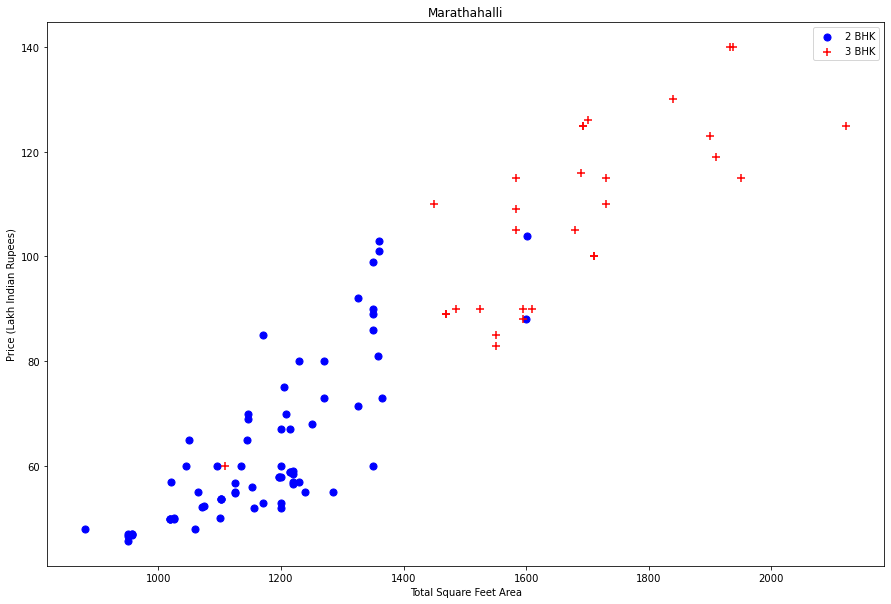

In [53]:
plot_scatter_chart(data8,"Marathahalli")

# we want to know how many apartments or how many properties we have  in per sqft?

Text(0, 0.5, 'Count')

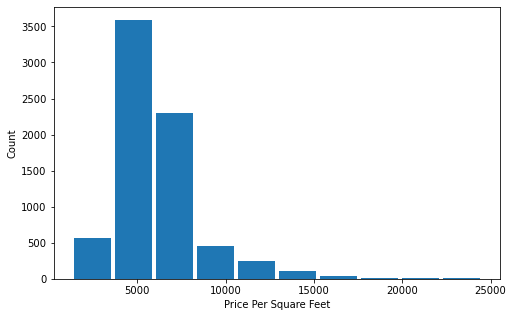

In [54]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (8,5)
plt.hist(data8.price_per_sqft,rwidth=0.9)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

from 0 to  10k rs  per sqft range we have majority of data points.


# now explore bathroom features

In [55]:
data8.bath.unique()

array([ 2.,  3.,  4.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

#there are properties which hase 13,&16 bathrooms,

In [56]:
data8[data8.bath>10]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
8636,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
3096,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
3609,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
7979,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
9935,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


Text(0, 0.5, 'Count')

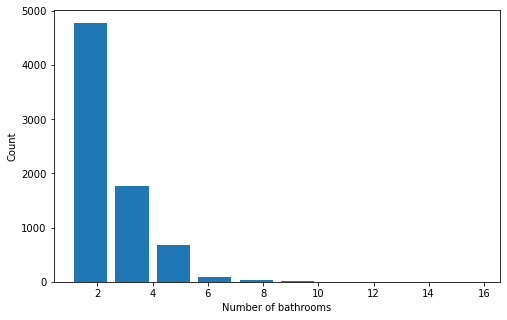

In [57]:
plt.hist(data8.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

It is unusual to have 2 more bathrooms than number of bedrooms in a home

In [58]:
data8[data8.bath>data8.bhk+2]


,location,size,total_sqft,bath,price,bhk,price_per_sqft
7709,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
11366,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
12103,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
2620,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689


In [59]:
data9 = data8[data8.bath<data8.bhk+2]
data9.shape


(7264, 7)

In [60]:
data10 = data9.drop(['size','price_per_sqft'],axis='columns')
data10.head(50)


,location,total_sqft,bath,price,bhk
341,Devarachikkanahalli,1250.0,2.0,40.00,2
2474,Devarachikkanahalli,1200.0,2.0,83.00,2
5030,Devarachikkanahalli,1170.0,2.0,40.00,2
5771,Devarachikkanahalli,1425.0,2.0,65.00,3
6591,Devarachikkanahalli,947.0,2.0,43.00,2
7536,Devarachikkanahalli,1130.0,2.0,36.00,2
7767,Devarachikkanahalli,1417.0,2.0,76.00,3
8268,Devarachikkanahalli,1230.0,2.0,58.00,2
8954,Devarachikkanahalli,1705.0,3.0,75.00,3
9894,Devarachikkanahalli,1116.0,2.0,47.00,2


# Use One Hot Encoding For Location

In [61]:
dummies = pd.get_dummies(data10.location)
dummies

,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
341,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2474,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5030,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5771,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6591,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13238,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
13245,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
13285,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
13291,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [62]:
data11 = pd.concat([data10,dummies.drop('other',axis='columns')],axis='columns') # to avoid a dummy variable trap you shoul have less  dummies columns,
data11.head(20)                                                                   #here i drop others column

,location,total_sqft,bath,price,bhk,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
341,Devarachikkanahalli,1250.0,2.0,40.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2474,Devarachikkanahalli,1200.0,2.0,83.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5030,Devarachikkanahalli,1170.0,2.0,40.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5771,Devarachikkanahalli,1425.0,2.0,65.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6591,Devarachikkanahalli,947.0,2.0,43.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7536,Devarachikkanahalli,1130.0,2.0,36.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7767,Devarachikkanahalli,1417.0,2.0,76.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8268,Devarachikkanahalli,1230.0,2.0,58.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8954,Devarachikkanahalli,1705.0,3.0,75.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9894,Devarachikkanahalli,1116.0,2.0,47.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [63]:
data12 = data11.drop('location',axis='columns')
data12.head()

,total_sqft,bath,price,bhk,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
341,1250.0,2.0,40.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2474,1200.0,2.0,83.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5030,1170.0,2.0,40.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5771,1425.0,2.0,65.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6591,947.0,2.0,43.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [64]:
data12.shape

(7264, 245)

# Let's Build a Model Now

In [65]:
X = data12.drop(['price'],axis='columns')
X.head()

,total_sqft,bath,bhk,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
341,1250.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2474,1200.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5030,1170.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5771,1425.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6591,947.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [66]:
X.shape

(7264, 244)

In [67]:
y = data12.price
y.head()

341     40.0
2474    83.0
5030    40.0
5771    65.0
6591    43.0
Name: price, dtype: float64

In [68]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [69]:
#Creating linear regression model

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [70]:
print("Linear Regression score : ",model.score(X_train,y_train))


Linear Regression score :  0.8662327826333873


# Test the model for few properties

In [71]:
X.columns

Index(['total_sqft', 'bath', 'bhk', ' Devarachikkanahalli',
       '1st Block Jayanagar', '1st Phase JP Nagar',
       '2nd Phase Judicial Layout', '2nd Stage Nagarbhavi',
       '5th Block Hbr Layout', '5th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=244)

In [72]:
np.where(X.columns=='1st Block Jayanagar')[0][0]

4

In [73]:
def predict_price(location,sqft,bath,bhk):            #the pred price func takes loc, sft,bath,bhk as input
    loc_index = np.where(X.columns==location)[0][0]   # and it return us  the price

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk                       #and once we have location index  we set the  particular index value to be 1 here
    if loc_index >= 0:                      
        x[loc_index] = 1

    return model.predict([x])[0]

In [74]:
predict_price('1st Phase JP Nagar',1000, 2, 2)

88.92571491858753

In [75]:
predict_price('Electronic City Phase II',1056,2,2)

34.0080537393404

In [76]:
data5.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [77]:
predict_price('1st Phase JP Nagar',1500, 3, 3)

131.09209628666284

In [78]:
predict_price('Chikka Tirupathi',2600,5,4)

119.58520410181993

In [79]:
data12.head(60)

,total_sqft,bath,price,bhk,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
341,1250.0,2.0,40.00,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2474,1200.0,2.0,83.00,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5030,1170.0,2.0,40.00,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5771,1425.0,2.0,65.00,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6591,947.0,2.0,43.00,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7536,1130.0,2.0,36.00,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7767,1417.0,2.0,76.00,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8268,1230.0,2.0,58.00,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8954,1705.0,3.0,75.00,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9894,1116.0,2.0,47.00,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
